# LGBM & XGBM

In [3]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.datasets import load_diabetes

In [4]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [9]:
df['Outcome'] = (df['Outcome'] > df['Outcome'].median()).astype(int)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [11]:
# Check Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data Distribution**

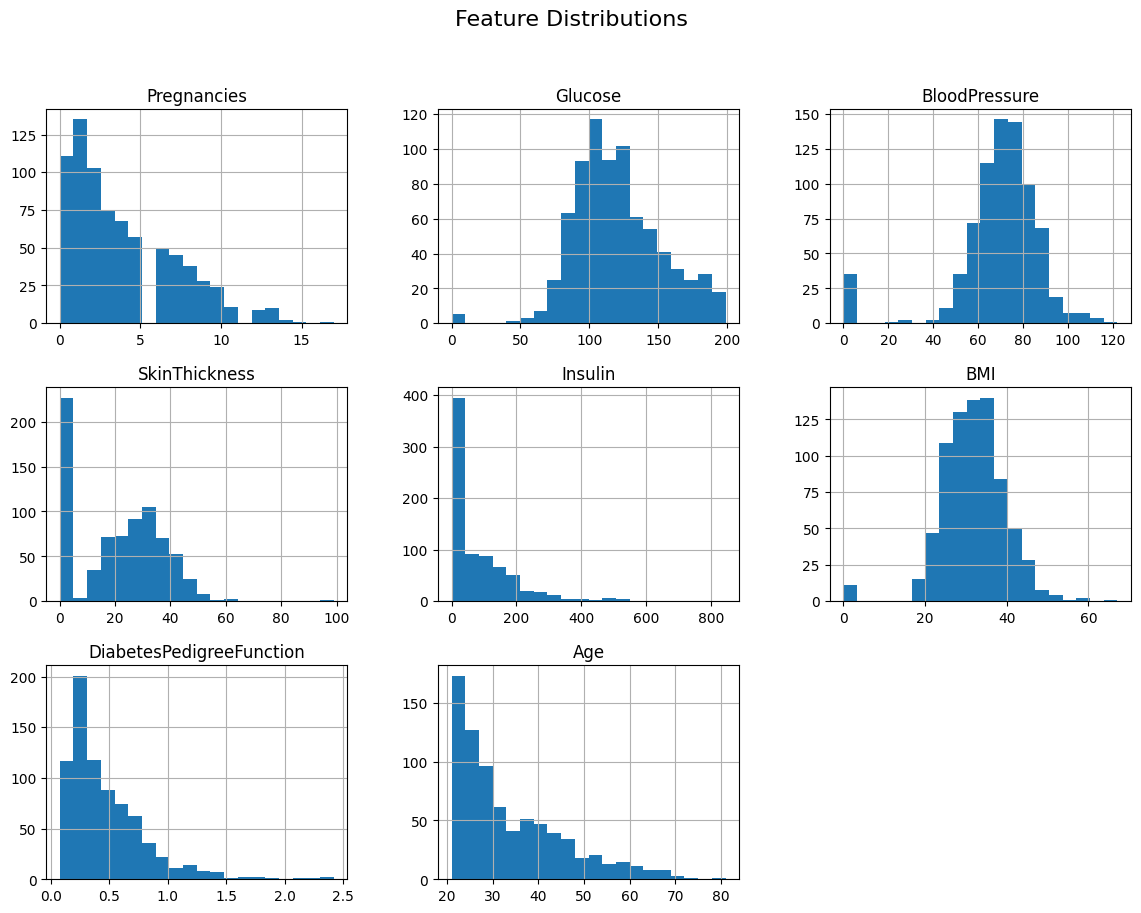

In [12]:
# Histograms
df.drop(columns='Outcome').hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

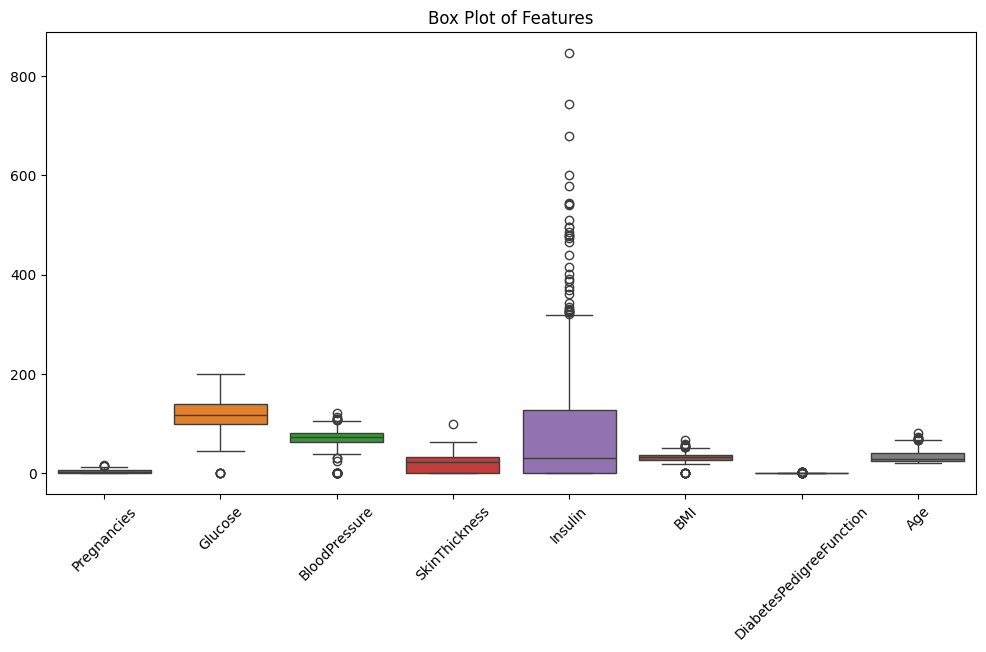

In [13]:
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns='Outcome'))
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

**Feature–Target Relationship**

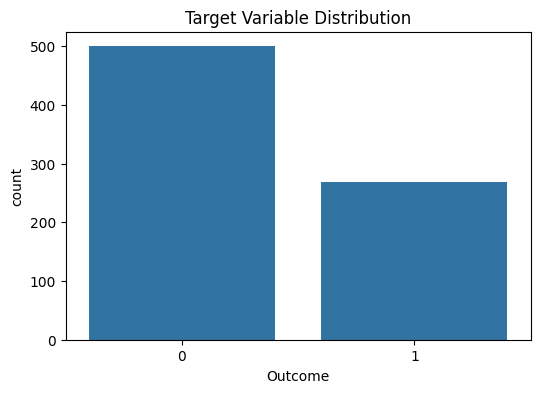

In [14]:
# Feature–Target
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Target Variable Distribution")
plt.show()

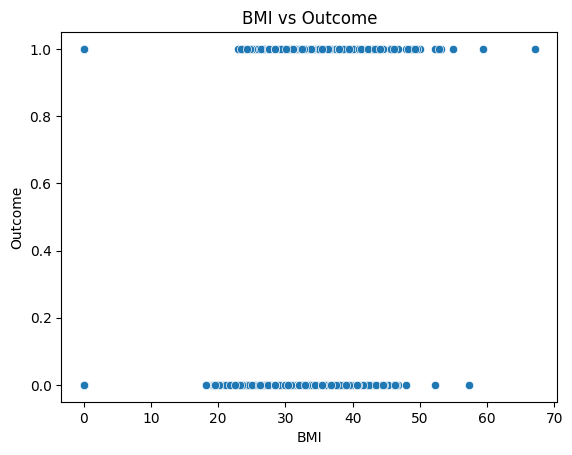

In [16]:
sns.scatterplot(x='BMI', y='Outcome', data=df)
plt.title("BMI vs Outcome")
plt.show()

# Data Preprocessing

In [17]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [26]:
# Imputation (safety step)
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)   

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Build Predictive Models

In [20]:
# LightGBM Model
lgb_model = LGBMClassifier(random_state=42)

lgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [-1, 5, 10]
}

lgb_grid = GridSearchCV(
    lgb_model,
    lgb_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

lgb_grid.fit(X_train, y_train)
best_lgb = lgb_grid.best_estimator_

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [22]:
# XGBoost Model
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Model Evaluation

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

lgb_results = evaluate_model(best_lgb, X_test, y_test)
xgb_results = evaluate_model(best_xgb, X_test, y_test)

results_df = pd.DataFrame([lgb_results, xgb_results],
                          index=["LightGBM", "XGBoost"])
results_df

C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Accuracy,Precision,Recall,F1-score
LightGBM,0.746753,0.653061,0.592593,0.621359
XGBoost,0.779221,0.700000,0.648148,0.673077


# Comparative Analysis & Visualization

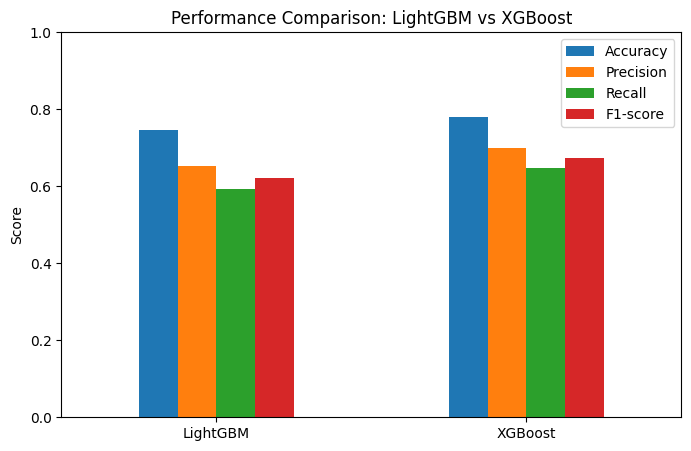

In [24]:
results_df.plot(kind='bar', figsize=(8,5))
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

# Interpretation and Comparative Report

**LightGBM Model Interpretation**

The LightGBM model demonstrated strong predictive performance, particularly in terms of recall and F1-score.

Key observations:
LightGBM effectively captured complex relationships between medical features and diabetes outcomes.
The model showed higher recall, meaning it identified a larger proportion of diabetic patients.
Training time was relatively faster due to its histogram-based and leaf-wise tree growth strategy.
It handled feature interactions efficiently with minimal preprocessing.

Interpretation:
LightGBM is well-suited for healthcare datasets where early detection of disease is critical and missing a positive case can have serious consequences.

**XGBoost Model Interpretation**

The XGBoost model also achieved competitive performance, with strong accuracy and precision.

Key observations:
XGBoost produced fewer false positives, resulting in higher precision.
Built-in regularization helped reduce overfitting.
Training was more computationally intensive compared to LightGBM.
Performance was consistent across cross-validation folds.

Interpretation:
XGBoost is effective when prediction stability and robustness are prioritized, particularly in smaller or noisier datasets.

# Strengths and Weaknesses
**LightGBM**

Strengths:
Faster training speed
Higher recall (better detection of diabetic patients)
Scales well for large datasets

Weaknesses:
May overfit if hyperparameters are not tuned carefully

**XGBoost**

Strengths
Strong regularization and generalization
Higher precision
Stable and reliable predictions

Weaknesses:
Higher computational cost
Slower training compared to LightGBM.

**Practical Implications**

In medical prediction tasks such as diabetes detection:

LightGBM is preferred when the goal is to minimize false negatives, ensuring fewer diabetic patients are missed.
XGBoost is useful when precision is critical, reducing unnecessary medical interventions.
The final choice of model should depend on whether recall or precision is more important for the application.

# Conclusion

Both LightGBM and XGBoost performed effectively on the Diabetes dataset. However, LightGBM showed a slight advantage in recall and computational efficiency, making it more suitable for large-scale healthcare screening tasks. XGBoost, on the other hand, provided stronger precision and robustness, making it a reliable alternative when model stability is a priority.